# 一、归一化方法

- 主要包括：概念、算法流程、作用、应用场景
- 可选：实例归一化，群组归一化，层归一化，局部相应归一化等。

## 1.1 为什么要做归一化
- 数据归一化是深度学习中数据预处理非常关键的步骤，可以起到统一量纲的作用。归一化是指将所有的数据都转化为[0,1]或者[-1,1]之间的数，目的是为了取消各维度之间数据的数量级差别，避免因为输入输出数据数量级差别较大而造成网络预测误差较大。
- 归一化的方法主要有BN,LN,IN,GN,SN五种。
- 附论文链接：
1. Batch Normalization：https://arxiv.org/pdf/1502.03167.pdf
2. Layer Normalizaiton：https://arxiv.org/pdf/1607.06450v1.pdf
3. Instance Normalization：https://arxiv.org/pdf/1607.08022.pdf
4. Group Normalization：https://arxiv.org/pdf/1803.08494.pdf
5. Switchable Normalization：https://arxiv.org/pdf/1806.10779.pdf

## 1.2 算法流程
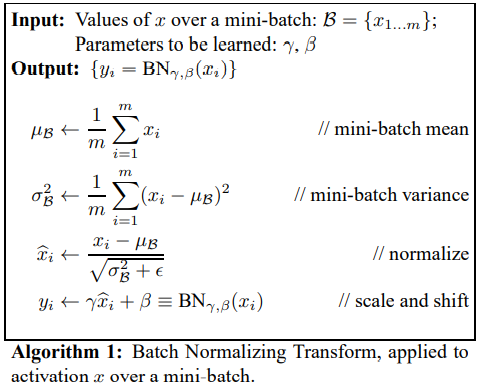

## 1.3 算法原理
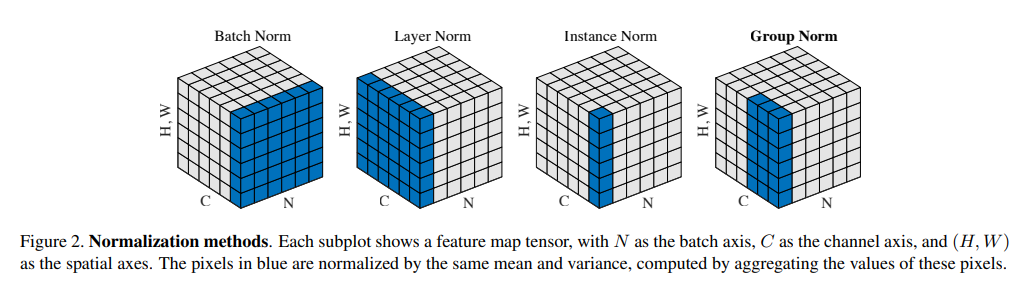
### 1.BN
1.BN的计算就是把每个通道的NHW单独拿出来归一化处理

2.针对每个channel我们都有一组γ,β，所以可学习的参数为2*C

3.当batch size越小，BN的表现效果也越不好，因为计算过程中所得到的均值和方差不能代表全局
### 2.LN
1.LN的计算就是把每个CHW单独拿出来归一化处理，不受batchsize 的影响

2.常用在RNN网络，但如果输入的特征区别很大，那么就不建议使用它做归一化处理
### 3.IN
1.IN的计算就是把每个HW单独拿出来归一化处理，不受通道和batchsize 的影响

2.常用在风格化迁移，但如果特征图可以用到通道之间的相关性，那么就不建议使用它做归一化处理
### 4.GN
1.GN的计算就是把先把通道C分成G组，然后把每个gHW单独拿出来归一化处理，最后把G组归一化之后的数据合并成CHW

2.GN介于LN和IN之间，当然可以说LN和IN就是GN的特列，比如G的大小为1或者为C
### 5.SN
1.将 BN、LN、IN 结合，赋予权重，让网络自己去学习归一化层应该使用什么方法

# 二、可变形卷积方法

可变形卷积有v1,v2两个版本，需要全部介绍。

## 2.1 卷积的概念

- 卷积是数学分析中的一种积分变换的方法，在图像处理中采用的是卷积的离散形式。

### 1.卷积的计算
$$b[i,j]=sum（a[i+u,j+v]*w[u,v]）$$
上式中$w[u,v]$为卷积核，具体的卷积过程如下图所示：
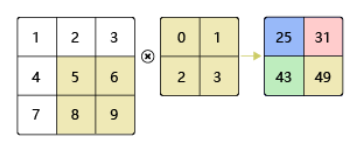

### 2.填充
如上图的例子所示，原图经过卷积之后，其大小会变小，而为了使得卷积之后图像的大小不发生变化，我们使用“填充”的方法，在原图周围加一圈或者两圈的“0”，保证卷积操作之后的图像大小不变。

### 3.步幅
上述卷积操作都是默认从图像的左上角开始，每次卷积向右或者向下平移一步，但是卷积核的平移不一定只能是1，而这个移动的步长称为步幅。

### 4.感受野
感受野：输出特征图上的像素点所能感受到的输入数据的范围。
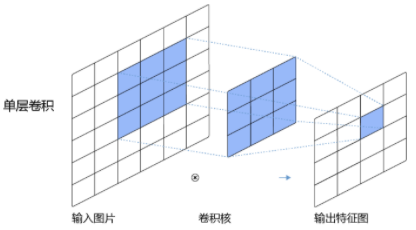
如上图所示，输出特征的一个像素点，其感受野的大小为原图中3*3的区域。当增加卷积网络的深度时，特征图中像素点的感受野会随之增大，因此该像素点也会包含原图的更多的语义信息。

## 2.2 可变形卷积-DCN v1
- 以下内容参考论文：Deformable Convolutional Networks

### 1.什么是可变形卷积
- 可变形卷积是指卷积核在每一个元素上额外增加了一个参数方法参数，这样，卷积核在训练时可以扩展到很大的范围。
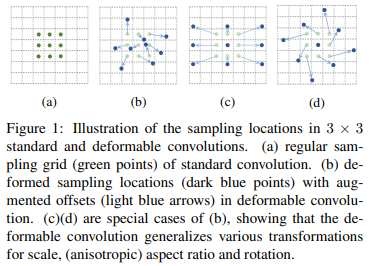
- 如上图(来自论文：Deformable Convolutional Networks)所示
- (a)表示传统的卷积；
- (b)表示可变形卷积，在(a)的基础上给每个卷积核的参数添加了一个方向向量，使得卷积核可以变成任意形状；
- (c)和(d)是可变形卷积的特殊形式。

### 2.为什么要使用可变形卷积
- 卷积核的目的是为了提取图像的特征，而传统的卷积核通常是固定尺寸，固定大小的卷积核，这种卷积核存在对未知的变化适应性差，泛化能力不强的问题。
- 在传统的卷积部分，我们提到过感受野的概念，可以得知，若是网络的层数较少，则最终得到的特征图中的像素点只受原图中固定位置的像素点影响，且位置始终固定。
- 为了解决上述这个问题，我们需要一种能够自动调整尺度或者感受野的方法，以此来更好的提取输入特征。

### 3.可变形卷积的结构
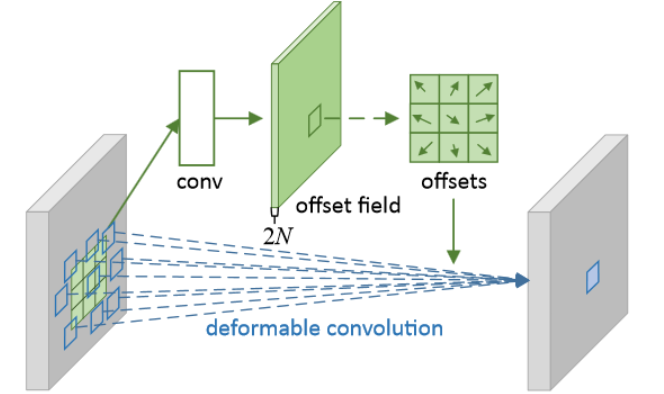
- 可变形卷积单元中增加的偏移量是网络结构的一部分，通过另外一个平行的标准卷积单元计算得到，进而也可以通过梯度反向传播进行端到端的学习。加上该偏移量的学习之后，可变形卷积核的大小和位置可以根据当前需要识别的图像内容进行动态调整，其直观效果就是不同位置的卷积核采样点位置会根据图像内容发生自适应的变化，从而适应不同物体的形状、大小等几何形变。

### 4.可变形卷积的学习过程
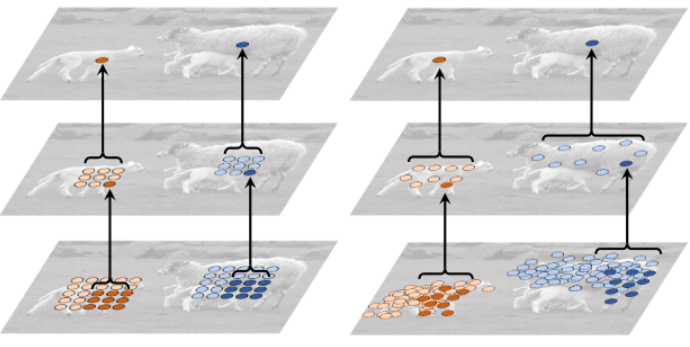
如上图所示，（左）为标准卷积的采样过程，（右）为可变形卷积的采样过程。可以看出，可变形卷积在采样时可以更加贴近物体的形状和尺寸。

## 2.3 可变形卷积-DCN v2
- 以下内容参考论文：Deformable ConvNets v2: More Deformable, Better Results
- 链接：https://arxiv.org/pdf/1811.11168.pdf

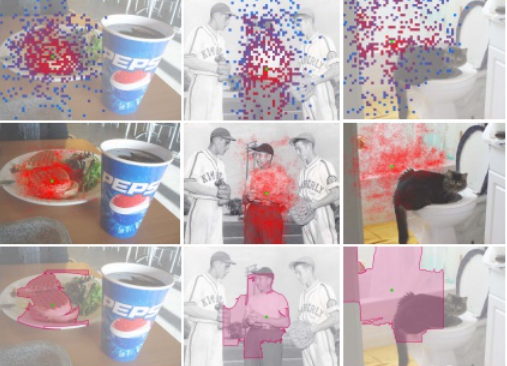
- DCN v1依然存在问题，即可能引入了无用的区域来干扰特征提取，如上图所示，可以看到，虽然可以覆盖整个物体，但是同时也会引入一些无关的背景。就此问题，作者提出了三个解决方法：

### 1.使用更多的可变形卷积
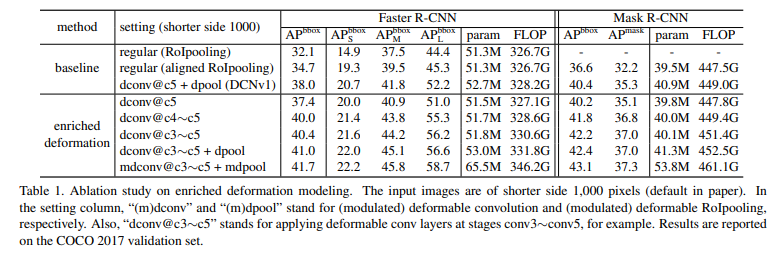
- 增加网络中可变形卷积的数量，提高算法对几何形状的建模能力。

### 2.在DCN v1的基础上添加每个采样点的权重
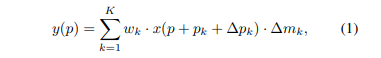
- 为了解决引入无关区域的问题，加入一个权重系数来区分区域是否为我们感兴趣的区域，例如如果一个采样点我们不感兴趣，则把权重设置为0.

### 3.模拟R-CNN的feature
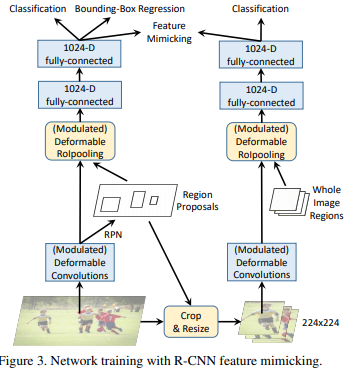
- 为了解决无关区域的问题，借助R-CNN网络的思想，R-CNN网络的输入是ROI在原图中裁剪得到的图像，而这部分图像中包含图像中物体的主题部分，大大的剔除了背景，因此不存在ROI以外区域信息的干扰。